# High latitude sample analysis

In [1]:
import pickle
import os
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import torch
os.chdir('..')
from star_sample import Isochrones,StarSample
os.chdir('Data')
pkl_file = open('isochrones_high_lat.pkl', 'rb')
Isochrone_hl = pickle.load(pkl_file)




os.chdir('..')

In [2]:
os.chdir('Data')
pkl_file = open('high_lat_values.pkl', 'rb')
High_Latitude_sample = pickle.load(pkl_file)
os.chdir('..')

Absolute magnitude

In [3]:
High_Latitude_sample.mean_absolute_mag_g_band(abs_column_name='G',magnitude_column='phot_g_mean_mag',parallax_column='parallax')

/Users/mattocallaghan/VaeStar/star_sample.py:56: RuntimeWarning: invalid value encountered in log10
  self.data[abs_column_name] = self.data[magnitude_column].values+5*np.log10(self.data[parallax_column].values/1000)+5


### HR diagram with LOG g

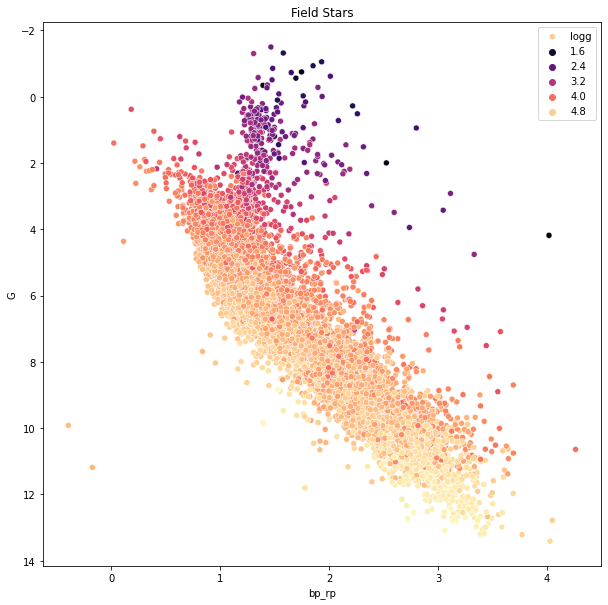

In [4]:
f, axes = plt.subplots(1, 1)
f.set_figheight(10)
f.set_figwidth(10)

scatter=High_Latitude_sample.data
sn.scatterplot(x=scatter['bp_rp'],y=scatter['G'],hue=scatter['logg_gspphot'],ax=axes,label='logg',color='g',palette=sn.color_palette("magma", as_cmap=True))

#axes.set_xlim(0,2.5)
axes.invert_yaxis()
plt.legend()
axes.set_title("Field Stars")
plt.show()

# Cut out the giants by removing low logg values

In [5]:
High_Latitude_sample.data=High_Latitude_sample.data[High_Latitude_sample.data['logg_gspphot']>4.5].reset_index(drop=True)

In [6]:
High_Latitude_sample.data['pdist']=1/High_Latitude_sample.data['parallax']

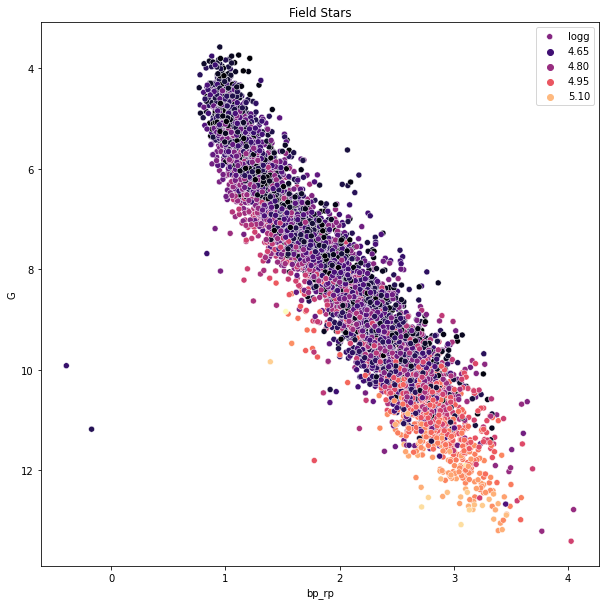

In [7]:
f, axes = plt.subplots(1, 1)
f.set_figheight(10)
f.set_figwidth(10)

scatter=High_Latitude_sample.data
sn.scatterplot(x=scatter['bp_rp'],y=scatter['G'],hue=scatter['logg_gspphot'],ax=axes,label='logg',color='g',palette=sn.color_palette("magma", as_cmap=True))

#axes.set_xlim(0,2.5)
axes.invert_yaxis()
plt.legend()
axes.set_title("Field Stars")
plt.show()

# Make Cuts To Produce a Familiar Family of Isochrones.

Similar to the cluster

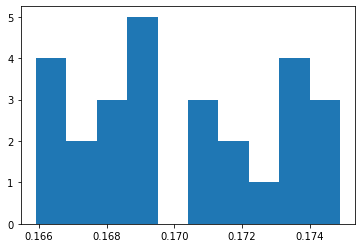

27


In [8]:
High_Latitude_sample.data=High_Latitude_sample.data[High_Latitude_sample.data['mh_gspphot']>0.165].reset_index(drop=True)
High_Latitude_sample.data=High_Latitude_sample.data[High_Latitude_sample.data['mh_gspphot']<0.175].reset_index(drop=True)
plt.hist(High_Latitude_sample.data['mh_gspphot'])
plt.show()
print(len(High_Latitude_sample.data))

# Find distance along the reddening vector.

In [9]:
stacked_isochrones=Isochrone_hl.stack_isochrones()#_subsample(feh_list,age_list)

In [10]:
High_Latitude_sample.data

,ra,dec,parallax,phot_g_mean_mag,phot_g_mean_flux,phot_rp_mean_flux,phot_bp_mean_flux,phot_bp_mean_mag,phot_rp_mean_mag,bp_rp,...,phot_bp_mean_flux_error,phot_rp_mean_flux_error,mh_gspphot,logg_gspphot,phot_g_mean_mag_error,bp_error,rp_error,bp_rp_error,G,pdist
0,44.394184,18.978551,1.902732,16.044868,7194.479888,6709.616250,2555.985361,16.819647,15.181151,1.638495,...,9.716605,14.055044,0.1684,4.6488,0.002869,0.005596,0.003600,0.006654,7.441757,0.525560
1,44.679718,18.891783,2.487785,16.214460,6154.073815,6410.105730,1766.050751,17.221035,15.230733,1.990302,...,15.639208,9.315880,0.1712,4.6544,0.002849,0.010331,0.003205,0.010817,8.193524,0.401964
2,44.944636,18.737970,2.627877,15.603016,10807.872714,10445.526069,3631.149377,16.438433,14.700570,1.737863,...,17.754274,21.235296,0.1691,4.5903,0.002796,0.006517,0.003558,0.007424,7.701041,0.380535
3,44.826281,19.105556,2.530549,15.287477,14452.920875,13345.493145,5184.038083,16.051872,14.434559,1.617313,...,14.737809,24.989149,0.1659,4.5821,0.002788,0.004880,0.003452,0.005977,7.303551,0.395171
4,43.975240,17.971872,2.500047,17.507339,1870.729776,2488.793090,278.474865,19.226578,16.257923,2.968655,...,11.496707,24.555574,0.1748,4.7311,0.003067,0.044983,0.011070,0.046325,9.497080,0.399992
5,45.092530,18.722895,1.068587,17.363234,2136.255964,2037.902595,712.470782,18.206625,16.474937,1.731688,...,7.703066,18.778090,0.1684,4.6380,0.003054,0.012332,0.010386,0.016123,7.507283,0.935815
6,43.265457,19.029741,2.841616,17.256319,2357.322593,3065.929995,351.680225,18.973173,16.031490,2.941683,...,6.923033,16.650820,0.1733,4.7326,0.003036,0.021705,0.006523,0.022664,9.524146,0.351912
7,45.375644,19.141613,4.409144,14.690285,25051.457831,25688.562587,7566.715477,15.641273,13.723546,1.917727,...,33.460648,56.493912,0.1669,4.6384,0.002976,0.006110,0.003672,0.007129,7.912056,0.226801
8,43.092601,18.243354,2.904501,14.508821,29608.655067,25945.812369,11662.161414,15.171595,13.712728,1.458867,...,16.145100,26.720819,0.1733,4.5817,0.002798,0.004067,0.003006,0.005058,6.824178,0.344293
9,45.608447,18.757414,1.668456,16.396753,5202.897074,5355.535867,1556.787223,17.357969,15.425888,1.932081,...,12.361406,11.925666,0.1683,4.6382,0.002883,0.009413,0.003692,0.010111,7.508328,0.599356


In [11]:
x_values=High_Latitude_sample.to_tensor(expandsize=stacked_isochrones.shape[-2])

In [12]:
age_list=[9.0]
feh_list=[0.17 for i in range(len(x_values))]#Cluster_sample.data['mh_gspphot']
stacked_isochrones=Isochrone_hl.stack_isochrones_subsample(feh_list,age_list)

### HR diagram

/opt/homebrew/Caskroom/miniforge/base/envs/astro/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


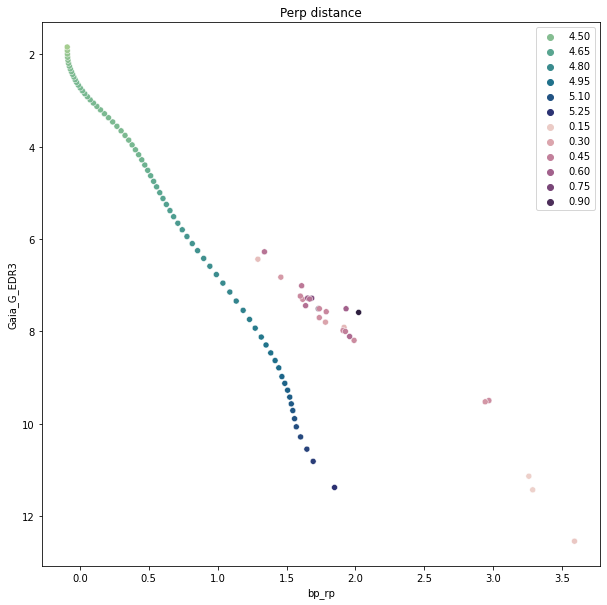

In [13]:
title='Perp distance'
mag_column='G'
colour_column='bp_rp'
hue_column='pdist'
height=10
width=10
isochrone=Isochrone_hl.isochrones_list[0]
f, axes = plt.subplots(1, 1)
f.set_figheight(height)
f.set_figwidth(width)
sn.scatterplot(isochrone['Gaia_BP_EDR3']-isochrone['Gaia_RP_EDR3'], isochrone['Gaia_G_EDR3'],hue=isochrone['logg'],palette='crest'
                                )
sn.scatterplot(x=High_Latitude_sample.data[colour_column],y=High_Latitude_sample.data[mag_column],hue=High_Latitude_sample.data[hue_column])#,kwargs=kwargs)



axes.invert_yaxis()
plt.legend()
axes.set_title(title)
plt.show()

/opt/homebrew/Caskroom/miniforge/base/envs/astro/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


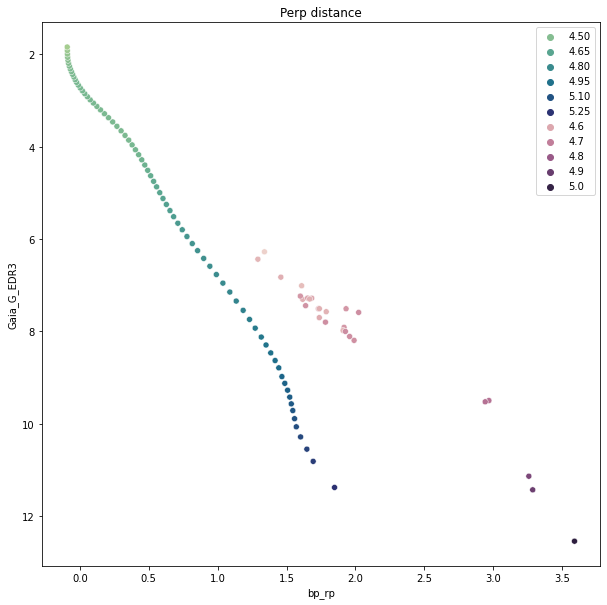

In [14]:
title='Perp distance'
mag_column='G'
colour_column='bp_rp'
hue_column='logg_gspphot'
height=10
width=10
isochrone=Isochrone_hl.isochrones_list[0]
f, axes = plt.subplots(1, 1)
f.set_figheight(height)
f.set_figwidth(width)
sn.scatterplot(isochrone['Gaia_BP_EDR3']-isochrone['Gaia_RP_EDR3'], isochrone['Gaia_G_EDR3'],hue=isochrone['logg'],palette='crest'
                                )
sn.scatterplot(x=High_Latitude_sample.data[colour_column],y=High_Latitude_sample.data[mag_column],hue=High_Latitude_sample.data[hue_column])#,kwargs=kwargs)



axes.invert_yaxis()
plt.legend()
axes.set_title(title)
plt.show()

In [15]:
x_columns=High_Latitude_sample.data.columns
isoc_columns=Isochrone_hl.isochrones_list[0].columns
def column_index(name):
    if name in x_columns:
        return np.where(np.array(x_columns)==name)[0][0]
    else:
        return np.where(np.array(isoc_columns)==name)[0][0] +len(x_columns)

In [16]:
isochrone=torch.cat([x_values,stacked_isochrones],dim=-1)

In [17]:
isochrone.shape

torch.Size([27, 96, 39])

We have 27 star samples. To each star sample there are 96 isochrone samples for each isochrone.

In [18]:
truth_1=(isochrone[:,:,column_index('G')]-(isochrone[:,:,column_index('bp_rp')])*isochrone[:,:,column_index('p_slopes')]<=isochrone[:,:,column_index('high_c')]) #box selection
truth_2=(isochrone[:,:,column_index('low_c')]<=isochrone[:,:,column_index('G')]-(isochrone[:,:,column_index('bp_rp')])*isochrone[:,:,column_index('p_slopes')])
truth=torch.logical_and(truth_1,truth_2)

In [19]:
truth.shape

torch.Size([27, 96])

In [20]:

a1=-1*isochrone[:,:,column_index('slopes')]
b1=1.0
c1=isochrone[:,:,column_index('slopes')]*isochrone[:,:,column_index('bp_rp')]-isochrone[:,:,column_index('G')]


a2=-1*isochrone[:,:,column_index('p_slopes')]
b2=1.0
c2=isochrone[:,:,column_index('p_slopes')]*isochrone[:,:,column_index('BPRP')]-isochrone[:,:,column_index('Gaia_G_EDR3')]


In [21]:

x=(b1*c2-b2*c1)/(a1*b2-a2*b1)
y=(a2*c1-a1*c2)/(a1*b2-a2*b1)


x and y should be the intersection points of each point (n_samples,n_isochrone_points)

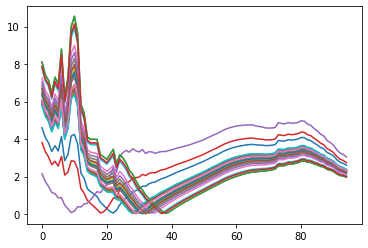

In [22]:

d=torch.sqrt((x.clone()-isochrone[:,:,column_index('bp_rp')].clone())**2+(y.clone()-isochrone[:,:,column_index('G')].clone())**2)
for i in range(len(d)):
    plt.plot(d[i])

In [23]:

idx=torch.argmin(torch.abs(d/truth.reshape(d.shape)).nan_to_num(nan=torch.inf),-1)
d=d.gather(1,idx.view(-1,1))

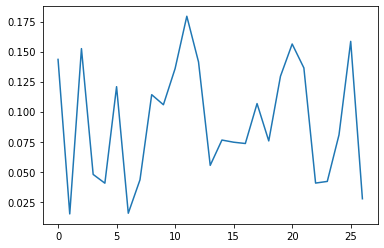

In [24]:
plt.plot(d)

/opt/homebrew/Caskroom/miniforge/base/envs/astro/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


KeyError: 'perp'

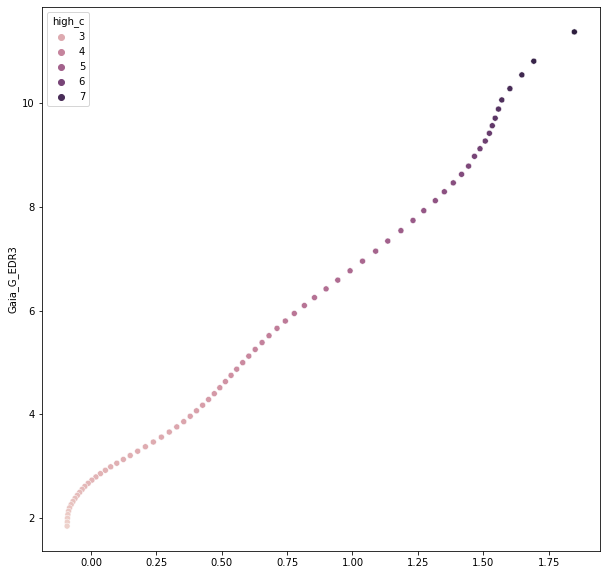

In [25]:
title='Perp distance'
mag_column='G'
colour_column='bp_rp'
hue_column='perp'
height=10
width=10
k=0
isochrone=Isochrone_hl.isochrones_list[0]
f, axes = plt.subplots(1, 1)
f.set_figheight(height)
f.set_figwidth(width)
sn.scatterplot(isochrone['Gaia_BP_EDR3']-isochrone['Gaia_RP_EDR3'], isochrone['Gaia_G_EDR3'],hue=isochrone['high_c']
                                )
import math
angle=math.atan(2.02)
dx=math.cos(angle)
dy=math.sin(angle)

plt.scatter(High_Latitude_sample.data[colour_column]+High_Latitude_sample.data['perp']*dx,High_Latitude_sample.data[mag_column]+High_Latitude_sample.data['perp']*dy)#,kwargs=kwargs)



axes.invert_yaxis()
plt.ylim(10,0)
plt.xlim(-2,4)
plt.legend()
axes.set_title(title)
plt.show()

# Distribution analysis

In [ ]:
High_Latitude_sample.data['perp']=np.array(d)
High_Latitude_sample.data['idx']=np.array(idx)
High_Latitude_sample.data['intersection_x']=x.gather(1,idx.view(-1,1))
High_Latitude_sample.data['intersection_y']=y.gather(1,idx.view(-1,1))

/opt/homebrew/Caskroom/miniforge/base/envs/astro/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


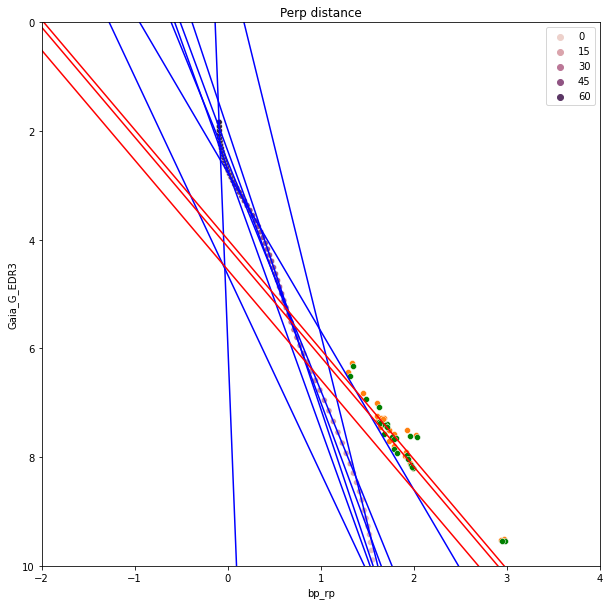

In [ ]:
title='Perp distance'
mag_column='G'
colour_column='bp_rp'
hue_column='perp'
height=10
width=10
isochrone=Isochrone_hl.isochrones_list[0]
f, axes = plt.subplots(1, 1)
f.set_figheight(height)
f.set_figwidth(width)
sn.scatterplot(isochrone['Gaia_BP_EDR3']-isochrone['Gaia_RP_EDR3'], isochrone['Gaia_G_EDR3'],hue=range(len(isochrone))
                                )
sn.scatterplot(x=High_Latitude_sample.data[colour_column],y=High_Latitude_sample.data[mag_column])#,kwargs=kwargs)

sn.scatterplot(x=High_Latitude_sample.data['intersection_x'],y=High_Latitude_sample.data['intersection_y'],color='g')#,kwargs=kwargs)




for i in range(len(isochrone)):
    if i%10==0:
        x = np.linspace(-5,5,100)


        y = isochrone['slopes'][i]*x+isochrone['Gaia_G_EDR3'][i]-isochrone['slopes'][i]*isochrone['BPRP'][i]
        plt.plot(x, y, '-b')

for i in range(len(High_Latitude_sample.data)):
    if(i%10==0):
        x = np.linspace(-5,5,100)
        y = 2.02*x+High_Latitude_sample.data['G'][i]-2.02*High_Latitude_sample.data['bp_rp'][i]
        plt.plot(x, y, '-r')

axes.invert_yaxis()
plt.ylim(10,0)
plt.xlim(-2,4)
plt.legend()
axes.set_title(title)
plt.show()